In [ ]:
import scipy.stats as rng
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tqdm import tqdm

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#Rough Work

16.839104196437773
14.86328732730297


(0.0, 30.0)

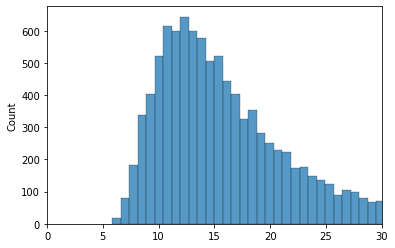

In [ ]:
temp=rng.lognorm.rvs(0.6, loc = 5, scale = 10, size=10000)
print(temp.mean())
print(np.median(temp))
sns.histplot(temp).set_xlim(0,30)
#1

28.601772614815697
28.03152862895805


(0.0, 50.0)

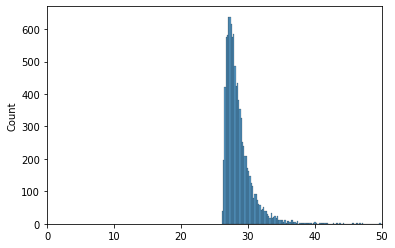

In [ ]:
temp=rng.lognorm.rvs(0.7, loc = 26, scale = 2, size=10000)
print(temp.mean())
print(np.median(temp))
sns.histplot(temp).set_xlim(0,50)
#2

19.54822767642387
18.981866600711193


(0.0, 50.0)

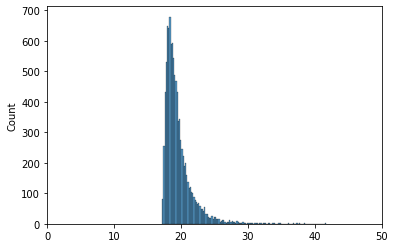

In [ ]:
temp=rng.lognorm.rvs(0.7, loc = 17, scale = 2, size=10000)
print(temp.mean())
print(np.median(temp))
sns.histplot(temp).set_xlim(0,50)
#3

14.369753489050403
13.3398453460702


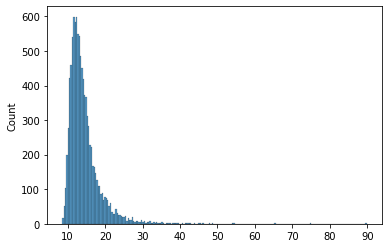

In [ ]:
temp=rng.mielke.rvs(1000000, 5, loc = 1, scale = 1, size=10000)
print(temp.mean())
print(np.median(temp))
sns.histplot(temp)

29.043198652740568
26.842808184553434


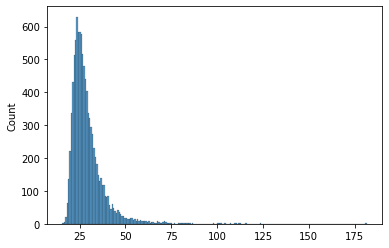

In [ ]:
temp=rng.mielke.rvs(40000000, 5, loc = 1, scale = 1, size=10000)
print(temp.mean())
print(np.median(temp))
sns.histplot(temp)

#Typical Bidders


In [ ]:
class early_bidder:
  def __init__(self, id):
    self.id = id
    self.name = "early_bidder"
    self.limit = rng.mielke.rvs(1000000, 5, loc = 1, scale = 1) #mielke mean=29.04
    self.valuation = rng.lognorm.rvs(0.6, loc = 0, scale = 1.5) #lognorm mean=
    self.private_log = []
    #self.bidding_prob = 0.5

  def next_watch(self, clock, hard_close):
    wait_time = rng.erlang.rvs(50, loc = 0, scale = 1) #erlang mean = 50
    return wait_time + clock

  def new_valuation(self):
    c = rng.uniform.rvs(1.0,0.9) #uniform
    self.valuation = min(c * self.valuation, self.limit)
    return self.valuation

  def bid_valuation(self, second_highest_bid, id_highest_bidder, clock, hard_close, logs):
    decision = 'n'
    if id_highest_bidder == self.id:
      return decision, 0
    new_bid = min(self.new_valuation(), self.limit)
    if second_highest_bid >= new_bid:
      return decision, 0
    if rng.uniform.rvs(0,1) > (clock / hard_close):
      decision = 'y'
    if decision == 'y':
      self.private_log.append((clock, new_bid))
    return decision, new_bid

In [ ]:
class sniper:
  def __init__(self, id):
    self.id = id
    self.name = "sniper"
    self.limit = rng.mielke.rvs(40000000, 5, loc = 1, scale = 1) #mean = 14.3
    self.private_log = []

  def next_watch(self, clock, hard_close):
    wait_time = rng.uniform.rvs(0,40)
    if clock == 0:
      return hard_close - 20 + wait_time
    return clock + wait_time

  def bid_valuation(self, second_highest_bid, id_highest_bidder, clock, hard_close, logs):
    decision = 'n'
    if id_highest_bidder == self.id:
      return decision, 0
    new_bid = min(2 * second_highest_bid, self.limit)
    if second_highest_bid >= new_bid:
      return decision, 0
    decision = 'y'
    self.private_log.append((clock, new_bid))
    return decision, new_bid

#For Part2

In [ ]:
class special_sniper:
  def __init__(self, id, sniping_time):
    self.id = id
    self.name = "special_sniper"
    self.limit = rng.mielke.rvs(40000000, 5, loc = 1, scale = 1) #mielke mean=29.04
    self.sniping_time = sniping_time
    self.private_log = []

  def next_watch(self, clock, hard_close):
    wait_time = self.sniping_time
    if clock==0:
      return wait_time
    return hard_close + 1

  def bid_valuation(self, second_highest_bid, id_highest_bidder, clock, hard_close, logs):
    decision = 'n'
    if id_highest_bidder == self.id:
      return decision, 0
    new_bid = min(2 * second_highest_bid, self.limit)
    if second_highest_bid >= new_bid:
      return decision, 0
    decision = 'y'
    self.private_log.append((clock, new_bid))
    return decision, new_bid

#For Part 4

In [ ]:
class reserve_shiller:
  def __init__(self, id, hard_close):
    self.id = id
    self.name = "reserve_shiller"
    self.target = rng.lognorm.rvs(0.7, loc = 26 , scale = 2) #adjust parameters 11.7, 17, 26
    self.stoppage_time = hard_close - 100
    self.private_log = []

  def next_watch(self, clock, hard_close):
    wait_time = rng.erlang.rvs(5, loc = 0, scale = 1) #erlang mean = 5
    return wait_time + clock

  def bid_valuation(self, second_highest_bid, id_highest_bidder, clock, hard_close, logs):
    decision = 'n'
    if id_highest_bidder == self.id or clock > self.stoppage_time or self.target < second_highest_bid:
      return decision , 0
    new_bid = min(rng.uniform.rvs(1.5,1) * second_highest_bid, self.target)
    decision = 'y'
    self.private_log.append((clock, new_bid))
    return decision, new_bid


#For Part 6

In [ ]:
class buy_back_shiller:
  def __init__(self, id):
    self.id = id
    self.name = "buy_back_shiller"
    self.target = rng.lognorm.rvs(0.6, loc = 5 , scale = 10)
    self.private_log = []

  def next_watch(self, clock, hard_close):
    if clock == 0:
      wait_time = hard_close - 5
    else:
      wait_time = hard_close + 1
    return wait_time

  def bid_valuation(self, second_highest_bid, id_highest_bidder, clock, hard_close, logs):
    decision = 'n'
    if id_highest_bidder == self.id or second_highest_bid > self.target:
      return decision, 0
    new_bid = rng.uniform.rvs(1.5,1)*second_highest_bid
    decision = 'y'
    self.private_log.append((clock, new_bid))
    return decision, new_bid


# For Part 5

In [ ]:
class competitive_shiller:
  def __init__(self, id, hard_close):
    self.id = id
    self.name = "competitive_shiller"
    self.stoppage_time = hard_close - 100
    self.private_log = []

  def next_watch(self, clock, hard_close):
    wait_time = rng.erlang.rvs(2, loc = 0, scale = 1) #erlang mean = 5
    return wait_time + clock

  def wt_moving_avg(self):
    x1 = self.private_log[-1][1] - self.private_log[-2][1]
    x2 = self.private_log[-2][1] - self.private_log[-3][1]
    x3 = self.private_log[-3][1] - self.private_log[-4][1]
    return (3*x1+2*x2+1*x3)/6

  def bid_valuation(self, second_highest_bid, id_highest_bidder, clock, hard_close, logs):
    decision = 'n'
    if id_highest_bidder == self.id or clock > self.stoppage_time:
      return decision, 0
    new_bid = (rng.uniform.rvs(1.5,1)*second_highest_bid) if (len(self.private_log) < 4) else (second_highest_bid + self.wt_moving_avg())
    decision = 'y'
    self.private_log.append((clock, new_bid))
    return decision, new_bid


# For Part 7

In [ ]:
class cCompetitive_shiller:
  def __init__(self, id, hard_close):
    self.id = id
    self.name = "cCompetitive_shiller"
    self.stoppage_time = hard_close - 100
    self.private_log = []
    self.threshold = hard_close/(rng.norm.rvs(14.5, 2.9))

  def next_watch(self, clock, hard_close):
    wait_time = rng.erlang.rvs(2, loc = 0, scale = 1) #erlang mean = 5
    return wait_time + clock

  def congestion_calculation(self, logs):
    factor = 1
    if logs[-1][0] > self.threshold:
      factor = rng.uniform.rvs(1,1)
    else:
      factor = rng.uniform.rvs(2,1)
    return factor

  def bid_valuation(self, second_highest_bid, id_highest_bidder, clock, hard_close, logs):
    decision = 'n'
    if id_highest_bidder == self.id or clock > self.stoppage_time or len(logs) == 0:
      return decision, 0
    decision = 'y'
    new_bid = second_highest_bid * self.congestion_calculation(logs)
    self.private_log.append((clock, new_bid))
    return decision, new_bid


# For Part 8

In [ ]:
class false_bidder:
  def __init__(self, id):
    self.id = id
    self.name = 'false_bidder'
    self.private_log = []
    self.increment = max(rng.lognorm.rvs(s=0.6089, loc=-1.92278, scale=6.5193),0)*0.5

  def next_watch(self, clock, hard_close):
    if clock == 0:
      wait_time = hard_close - 2
    else:
      wait_time = hard_close + 1
    return wait_time

  def bid_valuation(self, second_highest_bid, id_highest_bidder, clock, hard_close, logs):
    decision = 'y'
    new_bid = second_highest_bid + self.increment
    self.private_log.append((clock, new_bid))
    return decision, new_bid

#Auction

In [ ]:
class auction:
  def __init__(self, num_snipers, num_early_bidders, num_special_snipers, num_reserve_shillers, num_competitive_shillers, num_bb_shillers, num_cc_shillers, num_fbidders, hard_close):
    self.hard_close = hard_close
    self.clock = 0
    self.highest_bid = 0
    self.second_highest_bid = 0
    self.id_highest_bidder = -1
    self.event_list = []
    self.bidder_queue = []
    self.bid_trend = []
    self.total_bidders = 0

    for i in range(0, num_early_bidders):
      obj = early_bidder(i+self.total_bidders)
      self.bidder_queue.append(obj)
      next_watch_time =  obj.next_watch(self.clock, self.hard_close)
      self.event_list.append(next_watch_time)
    self.total_bidders += num_early_bidders

    for i in range(0, num_snipers):
      obj = sniper(i+self.total_bidders)
      self.bidder_queue.append(obj)
      next_watch_time = obj.next_watch(self.clock, self.hard_close)
      self.event_list.append(next_watch_time)
    self.total_bidders += num_snipers

    for i in range(0, num_special_snipers):
      obj = special_sniper(i+self.total_bidders, 495) #sniping_time CHANGE HERE
      self.bidder_queue.append(obj)
      next_watch_time = obj.next_watch(self.clock, self.hard_close)
      self.event_list.append(next_watch_time)
    self.total_bidders += num_special_snipers

    for i in range(0, num_reserve_shillers):
      obj = reserve_shiller(i+self.total_bidders, self.hard_close)
      self.bidder_queue.append(obj)
      next_watch_time = obj.next_watch(self.clock, self.hard_close)
      self.event_list.append(next_watch_time)
    self.total_bidders += num_reserve_shillers

    for i in range(0, num_competitive_shillers):
      obj = competitive_shiller(i+self.total_bidders, self.hard_close)
      self.bidder_queue.append(obj)
      next_watch_time = obj.next_watch(self.clock, self.hard_close)
      self.event_list.append(next_watch_time)
    self.total_bidders += num_competitive_shillers

    for i in range(0, num_bb_shillers):
      obj = buy_back_shiller(i+self.total_bidders)
      self.bidder_queue.append(obj)
      next_watch_time = obj.next_watch(self.clock, self.hard_close)
      self.event_list.append(next_watch_time)
    self.total_bidders += num_bb_shillers

    for i in range(0, num_cc_shillers):
      obj = cCompetitive_shiller(i+self.total_bidders, self.hard_close)
      self.bidder_queue.append(obj)
      next_watch_time = obj.next_watch(self.clock, self.hard_close)
      self.event_list.append(next_watch_time)
    self.total_bidders += num_cc_shillers

    for i in range(0, num_fbidders):
      obj = false_bidder(i+self.total_bidders)
      self.bidder_queue.append(obj)
      next_watch_time = obj.next_watch(self.clock, self.hard_close)
      self.event_list.append(next_watch_time)
    self.total_bidders += num_fbidders

  def run_auction(self):
    next_event_time = min(self.event_list)
    while next_event_time < self.hard_close:
      self.clock = next_event_time
      bidder_id = self.event_list.index(next_event_time)
      bidder = self.bidder_queue[bidder_id]
      decision, bid = bidder.bid_valuation(self.second_highest_bid, self.id_highest_bidder, self.clock, self.hard_close, self.bid_trend)
      if decision == 'y':
        if bid < self.highest_bid:
          self.second_highest_bid = bid
        else:
          self.second_highest_bid = self.highest_bid
          self.highest_bid = bid
          self.id_highest_bidder = bidder_id
        self.bid_trend.append((self.clock, self.second_highest_bid))
      self.event_list[bidder_id] = bidder.next_watch(self.clock, self.hard_close)
      next_event_time = min(self.event_list)

    winner = self.id_highest_bidder
    bidder_type = self.bidder_queue[winner].name
    highest = self.highest_bid
    second_highest = self.second_highest_bid
    return winner, bidder_type, highest, second_highest, len(self.bid_trend)

#1 Sniper Vs Early Bidder

In [ ]:
Auction = auction(3,7,0,0,0,0,0,0,500)
Auction.run_auction()

(9, 'sniper', 23.545626132675572, 20.705938143274448, 17)

In [ ]:
Auction.bid_trend

[(42.934051092594125, 0),
 (49.125402947261435, 0.8840804816361003),
 (51.47245644164307, 1.9701402639135976),
 (51.512444685785475, 2.383977801957772),
 (97.6348119545925, 2.396292991815981),
 (106.78903076406657, 2.454272920937541),
 (110.97217108822844, 2.5562225866937522),
 (111.22035688736929, 3.292533757409369),
 (158.2524054460099, 3.438703459756629),
 (168.38990006092826, 5.387176289006348),
 (248.14698605400653, 6.433153746573698),
 (316.78706028244306, 6.757766541824676),
 (327.5830951464237, 8.517690614129785),
 (407.48278094910324, 8.779643655495617),
 (481.4975735574231, 10.352969071637224),
 (491.3131471081557, 17.559287310991234),
 (499.3421609198751, 20.705938143274448)]

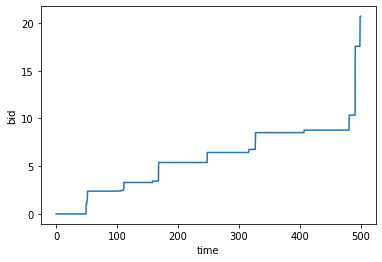

In [ ]:
trend_log = pd.DataFrame(Auction.bid_trend, columns=['time','bid'])
trend_log_list = [(0,0)]
for i in range(1,len(trend_log)):
  trend_log_list.append((int(trend_log.loc[i][0]),trend_log.loc[i-1][1]))
trend_log_list.append((500, trend_log.loc[len(trend_log)-1][1]))
trend_log2 = pd.DataFrame(trend_log_list, columns=['time','bid'])
trend_log=trend_log.append(trend_log2, ignore_index=True)
trend_log=trend_log.sort_values('time').reset_index()
sns.lineplot(data=trend_log, x='time', y='bid')

In [ ]:
logs = []
for i in tqdm(range(0,10000)):
  Auction = auction(3,7,0,0,0,0,0,0,500)
  logs.append(Auction.run_auction())
df_logs = pd.DataFrame(logs, columns=['bidder_id','bidder_type','highest_bid','second_highest_bid','bid_count'])

100%|██████████| 10000/10000 [01:56<00:00, 85.70it/s]


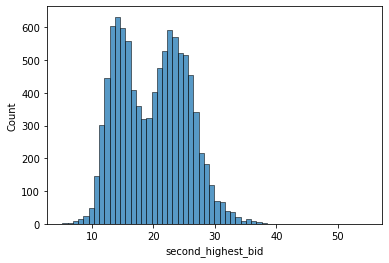

In [ ]:
sns.histplot(df_logs['second_highest_bid'])

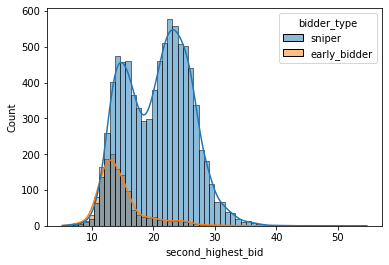

In [ ]:
sns.histplot(data=df_logs, x='second_highest_bid', hue='bidder_type', kde=True)

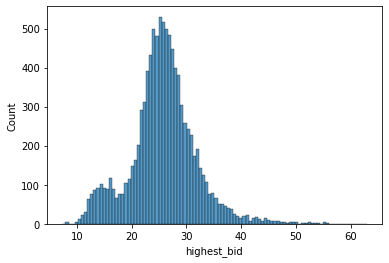

In [ ]:
sns.histplot(df_logs['highest_bid'])

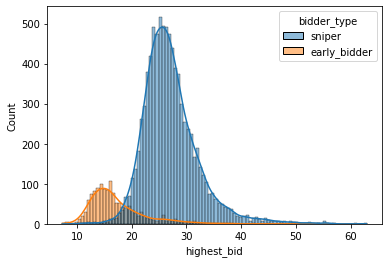

In [ ]:
sns.histplot(data=df_logs, x='highest_bid', hue='bidder_type', kde=True)

In [ ]:
df_logs[df_logs['bidder_type']=='sniper'].describe()

,bidder_id,highest_bid,second_highest_bid,bid_count
count,8640.000000,8640.000000,8640.000000,8640.000000
mean,8.000579,27.141714,20.721119,14.739931
std,0.816473,5.069055,5.307256,2.923903
min,7.000000,10.740961,5.947906,5.000000
25%,7.000000,23.910298,16.028284,13.000000
50%,8.000000,26.405534,21.246055,15.000000
75%,9.000000,29.416137,24.656741,17.000000
max,9.000000,62.900452,54.668904,26.000000


In [ ]:
df_logs[df_logs['bidder_type']=='early_bidder'].describe()

,bidder_id,highest_bid,second_highest_bid,bid_count
count,1360.000000,1360.000000,1360.000000,1360.000000
mean,3.020588,17.242696,14.626981,13.178676
std,1.986974,5.033991,3.978456,2.815596
min,0.000000,7.350829,5.210102,5.000000
25%,1.000000,13.911379,12.250676,11.000000
50%,3.000000,15.961367,13.667697,13.000000
75%,5.000000,19.244392,15.626786,15.000000
max,6.000000,53.971249,37.805448,22.000000


In [ ]:
df_logs.describe()

,bidder_id,highest_bid,second_highest_bid,bid_count
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,7.323300,25.795447,19.892316,14.527600
std,2.006734,6.095903,5.554412,2.958093
min,0.000000,7.350829,5.210102,5.000000
25%,7.000000,22.728349,14.939185,12.000000
50%,8.000000,25.716318,20.133955,14.000000
75%,9.000000,28.869500,24.215129,16.000000
max,9.000000,62.900452,54.668904,26.000000


In [ ]:
df_logs.to_csv('/content/drive/MyDrive/BTP Data/Part1.csv')

#2 What makes a sniper a SNIPER

In [ ]:
Auction = auction(2,7,1,0,0,0,0,0,500)
Auction.run_auction()

In [ ]:
Auction.bid_trend

In [ ]:
logs = []
for i in tqdm(range(0,2000)):
  Auction = auction(2,7,1,500)
  logs.append(Auction.run_auction())

100%|██████████| 2000/2000 [00:25<00:00, 78.65it/s]


In [ ]:
df_logs = pd.DataFrame(logs, columns=['bidder_id','bidder_type','highest_bid','second_highest_bid'])

In [ ]:
print(df_logs[df_logs['bidder_type']=='special_sniper'].mean())
print("Probability(100)")
print(len(df_logs[df_logs['bidder_type']=='special_sniper'])/len(df_logs)*100)

bidder_id              9.000000
highest_bid           17.019847
second_highest_bid    15.508607
dtype: float64
Probability(100)
0.44999999999999996


<ipython-input-52-8f61f2f26c66>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_logs[df_logs['bidder_type']=='special_sniper'].mean())


In [ ]:
print(df_logs[df_logs['bidder_type']=='special_sniper'].mean())
print("Probability(150)")
print(len(df_logs[df_logs['bidder_type']=='special_sniper'])/len(df_logs)*100)

bidder_id              9.000000
highest_bid           18.697036
second_highest_bid    15.982566
dtype: float64
Probability(150)
4.2


<ipython-input-56-7ef8fc404c0c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_logs[df_logs['bidder_type']=='special_sniper'].mean())


In [ ]:
print(df_logs[df_logs['bidder_type']=='special_sniper'].mean())
print("Probability(250)")
print(len(df_logs[df_logs['bidder_type']=='special_sniper'])/len(df_logs)*100)

bidder_id              9.000000
highest_bid           21.539201
second_highest_bid    17.197975
dtype: float64
Probability(250)
19.650000000000002


<ipython-input-60-f71548f926a7>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_logs[df_logs['bidder_type']=='special_sniper'].mean())


In [ ]:
print(df_logs[df_logs['bidder_type']=='special_sniper'].mean())
print("Probability(350)")
print(len(df_logs[df_logs['bidder_type']=='special_sniper'])/len(df_logs)*100)

bidder_id              9.000000
highest_bid           24.088471
second_highest_bid    18.680364
dtype: float64
Probability(350)
36.1


<ipython-input-64-94e578ea9830>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_logs[df_logs['bidder_type']=='special_sniper'].mean())


In [ ]:
print(df_logs[df_logs['bidder_type']=='special_sniper'].mean())
print("Probability(450)")
print(len(df_logs[df_logs['bidder_type']=='special_sniper'])/len(df_logs)*100)

bidder_id              9.000000
highest_bid           25.521006
second_highest_bid    19.188321
dtype: float64
Probability(450)
44.05


<ipython-input-68-cdaa5b4804a2>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_logs[df_logs['bidder_type']=='special_sniper'].mean())


In [ ]:
print(df_logs[df_logs['bidder_type']=='special_sniper'].mean())
print("Probability(495)")
print(len(df_logs[df_logs['bidder_type']=='special_sniper'])/len(df_logs)*100)

<ipython-input-72-72cfc6ee13c9>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_logs[df_logs['bidder_type']=='special_sniper'].mean())


bidder_id              9.000000
highest_bid           27.087007
second_highest_bid    20.861946
dtype: float64
Probability(495)
60.699999999999996


In [ ]:
df_logs[df_logs['bidder_type']=='early_bidder'].mean()

<ipython-input-16-f190879c5d35>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_logs[df_logs['bidder_type']=='early_bidder'].mean()


bidder_id              2.940080
highest_bid           17.260438
second_highest_bid    14.656343
dtype: float64

#3 HB-SHB Difference & Bid Count Analysis

In [ ]:
logs = []
for i in tqdm(range(0,10000)):
  Auction = auction(3,7,0,0,0,0,0,0,500)
  logs.append(Auction.run_auction())

100%|██████████| 10000/10000 [02:16<00:00, 73.23it/s]


In [ ]:
df_logs = pd.DataFrame(logs, columns=['bidder_id','bidder_type','highest_bid','second_highest_bid','bid_count'])

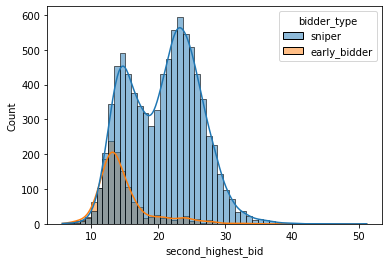

In [ ]:
sns.histplot(data=df_logs, x='second_highest_bid', hue='bidder_type', kde=True)


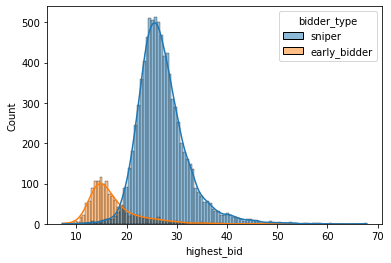

In [ ]:
sns.histplot(data=df_logs, x='highest_bid', hue='bidder_type', kde=True)

In [ ]:
df_logs['HB-SHB'] = df_logs['highest_bid']-df_logs['second_highest_bid']

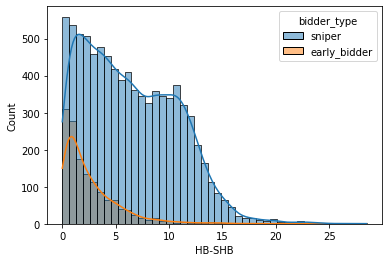

In [ ]:
sns.histplot(data=df_logs, x='HB-SHB', hue='bidder_type', kde=True)

(0.0, 30.0)

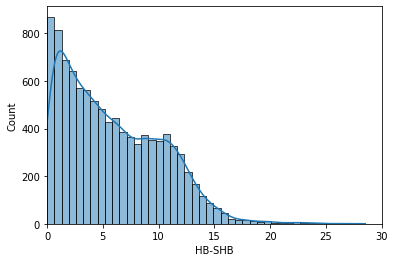

In [ ]:
sns.histplot(data=df_logs, x='HB-SHB', hue=None, kde=True).set_xlim(0,30)

In [ ]:
df_logs['HB-SHB'].describe()

count    10000.000000
mean         5.822388
std          4.355859
min          0.001335
25%          2.058686
50%          4.980617
75%          9.113672
max         28.512564
Name: HB-SHB, dtype: float64

In [ ]:
s, loc, scale = rng.lognorm.fit(df_logs['HB-SHB'])

5.942752800227478
5.297577404592256


(0.0, 30.0)

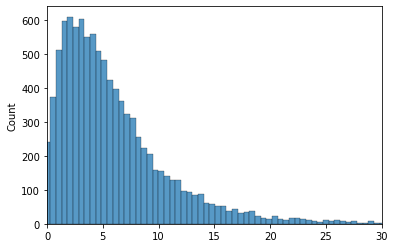

In [ ]:
test = rng.lognorm.rvs(s=s, loc=loc, scale=scale, size=10000)
print(np.mean(test))
print(np.std(test))
sns.histplot(test).set_xlim(0,30)

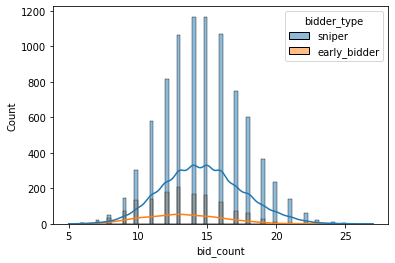

In [ ]:
sns.histplot(data=df_logs, x='bid_count', hue='bidder_type', kde=True)

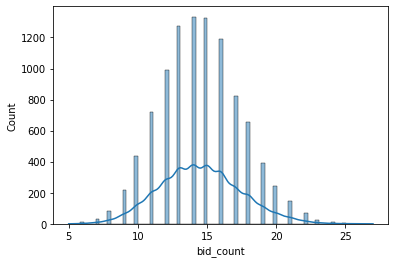

In [ ]:
sns.histplot(data=df_logs, x='bid_count', hue=None, kde=True)

In [ ]:
df_logs['bid_count'].describe()

count    10000.000000
mean        14.515800
std          2.919624
min          5.000000
25%         13.000000
50%         14.000000
75%         16.000000
max         27.000000
Name: bid_count, dtype: float64

In [ ]:
df_logs.to_csv('/content/drive/MyDrive/BTP Data/Part3.csv')

# 4a Reserve Price Shilling (target set around EB pay limit )

In [ ]:
logs = []
for i in tqdm(range(0,10000)):
  Auction = auction(3,6,0,1,0,0,0,0,500)
  logs.append(Auction.run_auction())
df_logs = pd.DataFrame(logs, columns=['bidder_id','bidder_type','highest_bid','second_highest_bid','bid_count'])

100%|██████████| 10000/10000 [03:19<00:00, 50.16it/s]


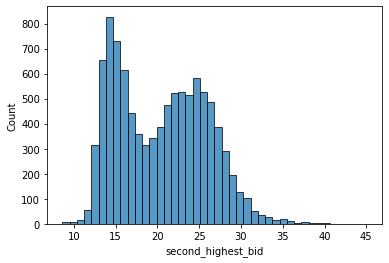

In [ ]:
sns.histplot(df_logs['second_highest_bid'])

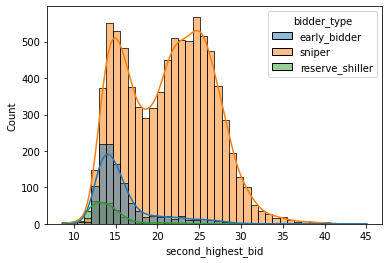

In [ ]:
sns.histplot(data=df_logs, x='second_highest_bid', hue='bidder_type', kde=True)

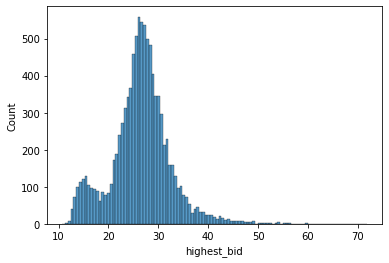

In [ ]:
sns.histplot(df_logs['highest_bid'])

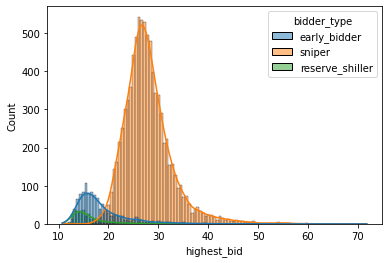

In [ ]:
sns.histplot(data=df_logs, x='highest_bid', hue='bidder_type', kde=True)

In [ ]:
df_logs[df_logs['bidder_type']=='sniper'].describe()

bidder_id              6.985068
highest_bid           27.955488
second_highest_bid    21.321356
bid_count             27.992301
dtype: float64

In [ ]:
df_logs[df_logs['bidder_type']=='early_bidder'].describe()

bidder_id              2.511251
highest_bid           18.462473
second_highest_bid    15.931576
bid_count             30.470747
dtype: float64

In [ ]:
df_logs[df_logs['bidder_type']=='reserve_shiller'].describe()

bidder_id              9.000000
highest_bid           15.800368
second_highest_bid    13.936050
bid_count             13.296530
dtype: float64

In [ ]:
df_logs.describe()

bidder_id              6.551900
highest_bid           26.515497
second_highest_bid    20.488438
bid_count             27.801800
dtype: float64

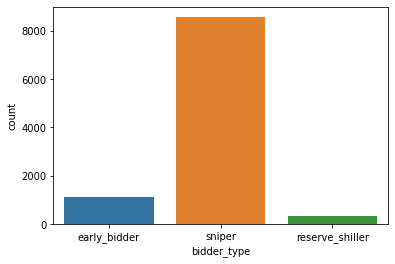

In [ ]:
sns.countplot(data=df_logs, x='bidder_type')

In [ ]:
df_logs.to_csv('/content/drive/MyDrive/BTP Data/Part4a.csv')

# 4b Reserve Price Shilling (target set between EB & Sn pay limits)

In [ ]:
logs = []
for i in tqdm(range(0,10000)):
  Auction = auction(3,6,0,1,0,0,0,0,500)
  logs.append(Auction.run_auction())
df_logs = pd.DataFrame(logs, columns=['bidder_id','bidder_type','highest_bid','second_highest_bid','bid_count'])

100%|██████████| 10000/10000 [03:14<00:00, 51.48it/s]


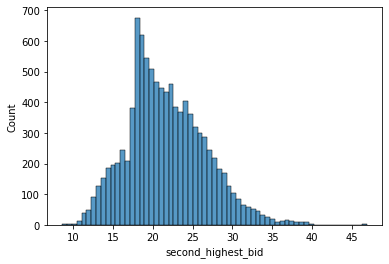

In [ ]:
sns.histplot(df_logs['second_highest_bid'])

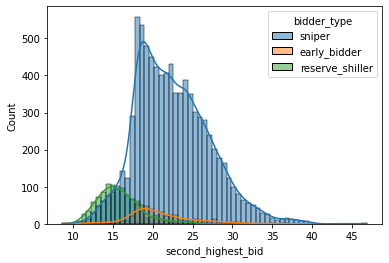

In [ ]:
sns.histplot(data=df_logs, x='second_highest_bid', hue='bidder_type', kde=True)

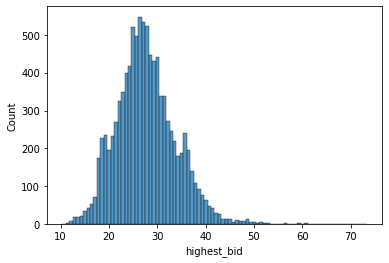

In [ ]:
sns.histplot(df_logs['highest_bid'])

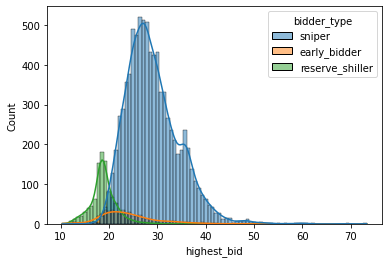

In [ ]:
sns.histplot(data=df_logs, x='highest_bid', hue='bidder_type', kde=True)

In [ ]:
df_logs[df_logs['bidder_type']=='sniper'].describe()

bidder_id              6.991482
highest_bid           29.033134
second_highest_bid    22.499256
bid_count             18.074766
dtype: float64

In [ ]:
df_logs[df_logs['bidder_type']=='early_bidder'].describe()

bidder_id              2.441584
highest_bid           24.118746
second_highest_bid    20.816782
bid_count             26.520792
dtype: float64

In [ ]:
df_logs[df_logs['bidder_type']=='reserve_shiller'].describe()

bidder_id              9.000000
highest_bid           18.882251
second_highest_bid    15.779589
bid_count             13.663148
dtype: float64

In [ ]:
df_logs.describe()

bidder_id              6.971000
highest_bid           27.727235
second_highest_bid    21.714102
bid_count             18.041600
dtype: float64

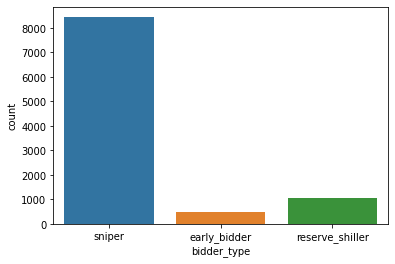

In [ ]:
sns.countplot(data=df_logs, x='bidder_type')

In [ ]:
df_logs.to_csv('/content/drive/MyDrive/BTP Data/Part4b.csv')

# 4c Reserve Price Shilling (target set around Sn pay limit)

In [ ]:
logs = []
for i in tqdm(range(0,10000)):
  Auction = auction(3,6,0,1,0,0,0,0,500)
  logs.append(Auction.run_auction())
df_logs = pd.DataFrame(logs, columns=['bidder_id','bidder_type','highest_bid','second_highest_bid','bid_count'])

100%|██████████| 10000/10000 [05:23<00:00, 30.88it/s]


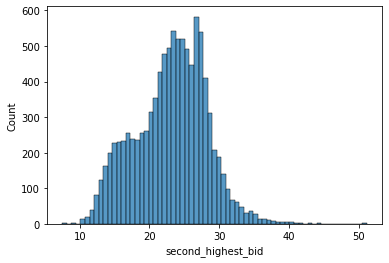

In [ ]:
sns.histplot(df_logs['second_highest_bid'])

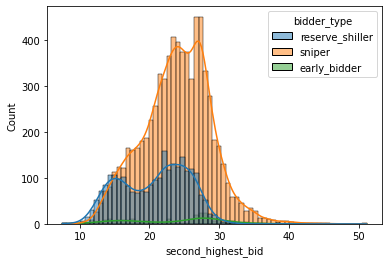

In [ ]:
sns.histplot(data=df_logs, x='second_highest_bid', hue='bidder_type', kde=True)

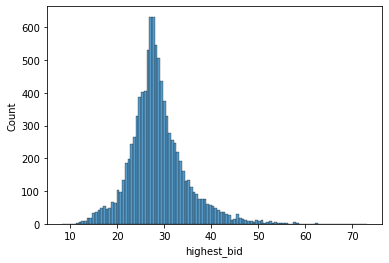

In [ ]:
sns.histplot(df_logs['highest_bid'])

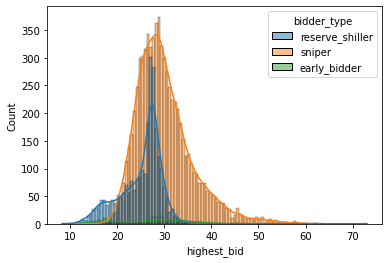

In [ ]:
sns.histplot(data=df_logs, x='highest_bid', hue='bidder_type', kde=True)

In [ ]:
df_logs[df_logs['bidder_type']=='sniper'].describe()

bidder_id              6.998204
highest_bid           30.014417
second_highest_bid    23.962565
bid_count             15.267100
dtype: float64

In [ ]:
df_logs[df_logs['bidder_type']=='early_bidder'].describe()

bidder_id              2.495968
highest_bid           27.321552
second_highest_bid    23.538014
bid_count             20.754032
dtype: float64

In [ ]:
df_logs[df_logs['bidder_type']=='reserve_shiller'].describe()

bidder_id              9.000000
highest_bid           25.032977
second_highest_bid    20.648972
bid_count             14.335586
dtype: float64

In [ ]:
df_logs.describe()

bidder_id              7.390000
highest_bid           28.694802
second_highest_bid    23.118668
bid_count             15.168900
dtype: float64

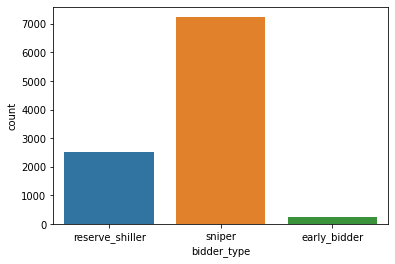

In [ ]:
sns.countplot(data=df_logs, x='bidder_type')

In [ ]:
df_logs.to_csv('/content/drive/MyDrive/BTP Data/Part4c.csv')

# 5a Competitive Shiller(T=500 units)

In [ ]:
logs = []
for i in tqdm(range(0,10000)):
  Auction = auction(3,6,0,0,1,0,0,0,500)
  logs.append(Auction.run_auction())
df_logs = pd.DataFrame(logs, columns=['bidder_id','bidder_type','highest_bid','second_highest_bid','bid_count'])

100%|██████████| 10000/10000 [06:17<00:00, 26.49it/s]


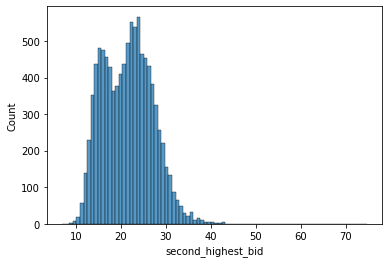

In [ ]:
sns.histplot(df_logs['second_highest_bid'])

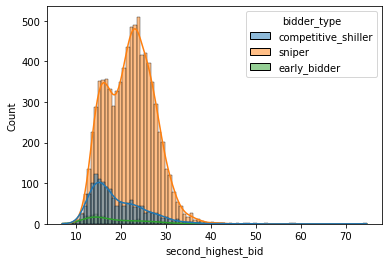

In [ ]:
sns.histplot(data=df_logs, x='second_highest_bid', hue='bidder_type', kde=True)

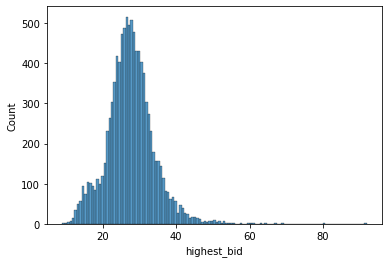

In [ ]:
sns.histplot(df_logs['highest_bid'])

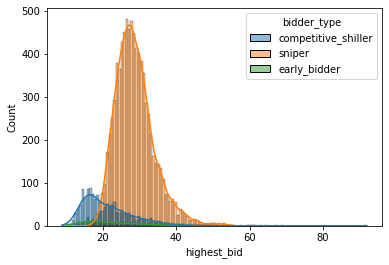

In [ ]:
sns.histplot(data=df_logs, x='highest_bid', hue='bidder_type', kde=True)

In [ ]:
df_logs[df_logs['bidder_type']=='sniper'].describe()

bidder_id              7.010256
highest_bid           28.768413
second_highest_bid    22.016672
bid_count             21.284870
dtype: float64

In [ ]:
df_logs[df_logs['bidder_type']=='early_bidder'].describe()

bidder_id              2.472727
highest_bid           22.726710
second_highest_bid    19.134167
bid_count             23.483636
dtype: float64

In [ ]:
df_logs[df_logs['bidder_type']=='competitive_shiller'].describe()

bidder_id              9.000000
highest_bid           21.235611
second_highest_bid    19.125909
bid_count             19.117606
dtype: float64

In [ ]:
df_logs.describe()

bidder_id              7.171400
highest_bid           27.519803
second_highest_bid    21.522000
bid_count             21.033900
dtype: float64

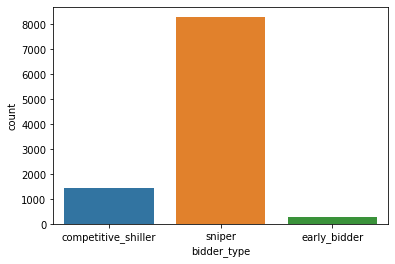

In [ ]:
sns.countplot(data=df_logs, x='bidder_type')

In [ ]:
df_logs.to_csv('/content/drive/MyDrive/BTP Data/5a.csv')

#5b Competitive Shiller(T=1500 units)

In [ ]:
logs = []
for i in tqdm(range(0,10000)):
  Auction = auction(3,6,0,0,1,0,0,0,1500)
  logs.append(Auction.run_auction())
df_logs = pd.DataFrame(logs, columns=['bidder_id','bidder_type','highest_bid','second_highest_bid','bid_count'])

100%|██████████| 10000/10000 [14:21<00:00, 11.60it/s]


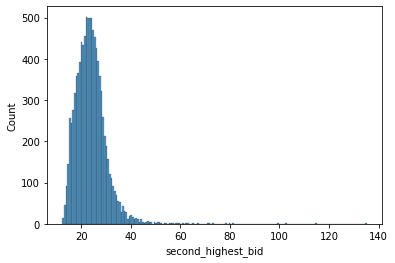

In [ ]:
sns.histplot(df_logs['second_highest_bid'])

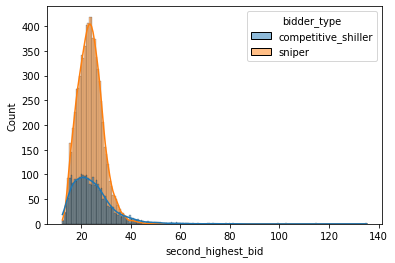

In [ ]:
sns.histplot(data=df_logs, x='second_highest_bid', hue='bidder_type', kde=True)

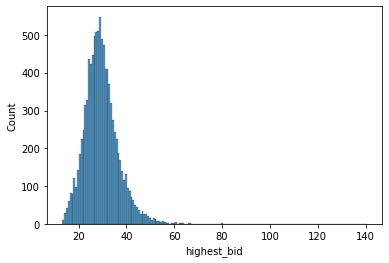

In [ ]:
sns.histplot(df_logs['highest_bid'])

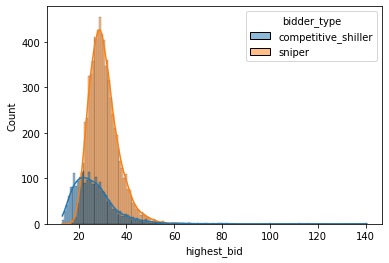

In [ ]:
sns.histplot(data=df_logs, x='highest_bid', hue='bidder_type', kde=True)

In [ ]:
df_logs[df_logs['bidder_type']=='sniper'].describe()

bidder_id              6.988151
highest_bid           30.587135
second_highest_bid    23.669190
bid_count             24.154840
dtype: float64

In [ ]:
df_logs[df_logs['bidder_type']=='early_bidder'].describe()

bidder_id             NaN
bidder_type           NaN
highest_bid           NaN
second_highest_bid    NaN
bid_count             NaN
dtype: object

In [ ]:
df_logs[df_logs['bidder_type']=='competitive_shiller'].describe()

bidder_id              9.000000
highest_bid           26.606875
second_highest_bid    24.731758
bid_count             24.709924
dtype: float64

In [ ]:
df_logs.describe()

bidder_id              7.488900
highest_bid           29.596448
second_highest_bid    23.933663
bid_count             24.293000
dtype: float64

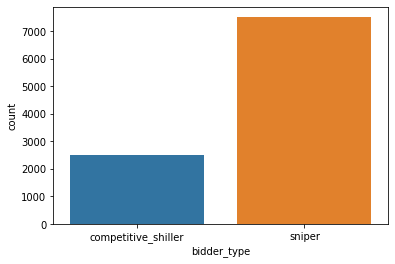

In [ ]:
sns.countplot(data=df_logs, x='bidder_type')

In [ ]:
df_logs.to_csv('/content/drive/MyDrive/BTP Data/Part5b.csv')

#6. Buy back Shiller

In [ ]:
logs = []
for i in tqdm(range(0,10000)):
  Auction = auction(3,6,0,0,0,1,0,0,500)
  logs.append(Auction.run_auction())
df_logs = pd.DataFrame(logs, columns=['bidder_id','bidder_type','highest_bid','second_highest_bid','bid_count'])

100%|██████████| 10000/10000 [01:49<00:00, 91.72it/s]


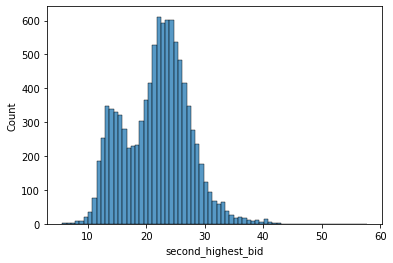

In [ ]:
sns.histplot(df_logs['second_highest_bid'])

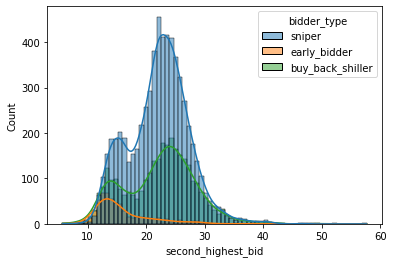

In [ ]:
sns.histplot(data=df_logs, x='second_highest_bid', hue='bidder_type', kde=True)

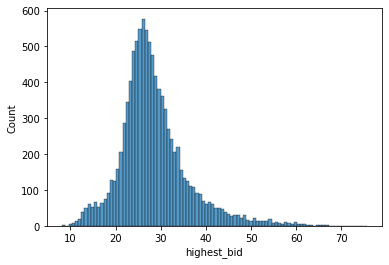

In [ ]:
sns.histplot(df_logs['highest_bid'])

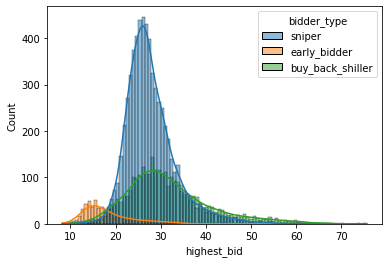

In [ ]:
sns.histplot(data=df_logs, x='highest_bid', hue='bidder_type', kde=True)

In [ ]:
df_logs[df_logs['bidder_type']=='sniper'].describe()

bidder_id              7.019899
highest_bid           27.826648
second_highest_bid    22.150343
bid_count             14.323752
dtype: float64

In [ ]:
df_logs[df_logs['bidder_type']=='early_bidder'].describe()

bidder_id              2.436207
highest_bid           18.448156
second_highest_bid    15.781497
bid_count             12.670690
dtype: float64

In [ ]:
df_logs[df_logs['bidder_type']=='buy_back_shiller'].describe()

In [ ]:
df_logs.describe()

bidder_id              7.365500
highest_bid           28.477351
second_highest_bid    21.831034
bid_count             14.213000
dtype: float64

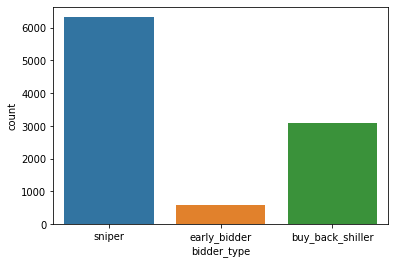

In [ ]:
sns.countplot(data=df_logs, x='bidder_type')

In [ ]:
df_logs.to_csv('/content/drive/MyDrive/BTP Data/Part6.csv')

#7. Congenstion based Competitive Shiller

In [ ]:
logs = []
for i in tqdm(range(0,10000)):
  Auction = auction(3,6,0,0,0,0,1,0,500)
  logs.append(Auction.run_auction())
df_logs = pd.DataFrame(logs, columns=['bidder_id','bidder_type','highest_bid','second_highest_bid','bid_count'])

100%|██████████| 10000/10000 [05:20<00:00, 31.17it/s]


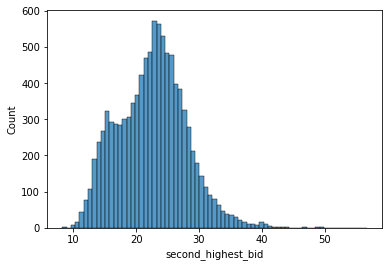

In [ ]:
sns.histplot(df_logs['second_highest_bid'])

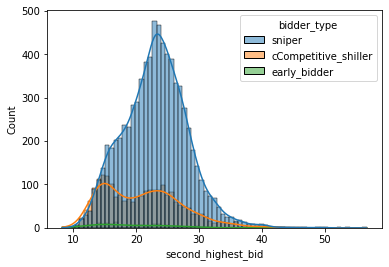

In [ ]:
sns.histplot(data=df_logs, x='second_highest_bid', hue='bidder_type', kde=True)

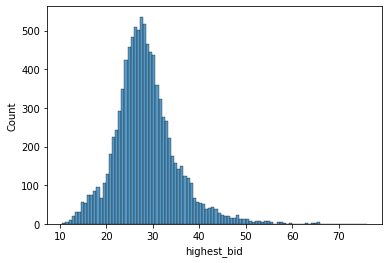

In [ ]:
sns.histplot(df_logs['highest_bid'])

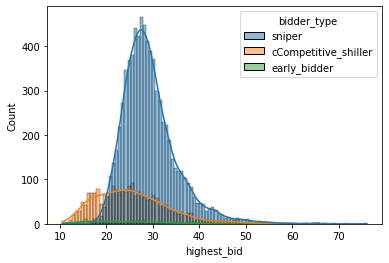

In [ ]:
sns.histplot(data=df_logs, x='highest_bid', hue='bidder_type', kde=True)

In [ ]:
df_logs[df_logs['bidder_type']=='sniper'].describe()

,bidder_id,highest_bid,second_highest_bid,bid_count
count,7601.000000,7601.000000,7601.000000,7601.000000
mean,6.975924,29.396075,23.097153,17.723326
std,0.818744,5.864809,5.088857,3.676833
min,6.000000,13.302500,8.905521,6.000000
25%,6.000000,25.467172,19.689863,15.000000
50%,7.000000,28.406033,23.176085,18.000000
75%,8.000000,32.007638,26.291584,20.000000
max,8.000000,76.040757,53.731007,35.000000


In [ ]:
df_logs[df_logs['bidder_type']=='early_bidder'].describe()

,bidder_id,highest_bid,second_highest_bid,bid_count
count,175.00000,175.000000,175.000000,175.000000
mean,2.44000,23.875765,19.638439,17.245714
std,1.73059,8.336894,6.165657,3.647101
min,0.00000,10.506718,9.862698,9.000000
25%,1.00000,17.291930,14.834206,15.000000
50%,2.00000,23.898171,18.769225,17.000000
75%,4.00000,28.128905,23.759240,20.000000
max,5.00000,65.674839,42.455766,29.000000


In [ ]:
df_logs[df_logs['bidder_type']=='cCompetitive_shiller'].describe()

In [ ]:
df_logs.describe()

,bidder_id,highest_bid,second_highest_bid,bid_count
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,7.346700,28.488380,22.582128,17.522000
std,1.302102,6.744813,5.495113,3.702551
min,0.000000,10.506718,8.236199,6.000000
25%,6.000000,24.453861,18.612544,15.000000
50%,7.000000,27.824620,22.776640,17.000000
75%,8.000000,31.673316,26.053848,20.000000
max,9.000000,76.040757,56.690583,35.000000


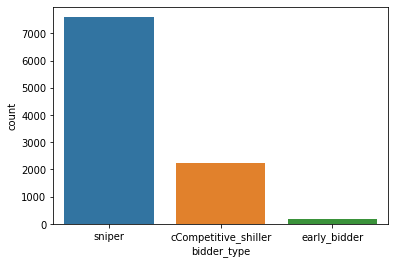

In [ ]:
sns.countplot(data=df_logs, x='bidder_type')

In [ ]:
df_logs.to_csv('/content/drive/MyDrive/BTP Data/Part7.csv')

#8. False Bidder

In [ ]:
logs = []
for i in tqdm(range(0,10000)):
  Auction = auction(3,6,0,0,0,0,0,1,500)
  logs.append(Auction.run_auction())
df_logs = pd.DataFrame(logs, columns=['bidder_id','bidder_type','highest_bid','second_highest_bid','bid_count'])

100%|██████████| 10000/10000 [01:44<00:00, 95.80it/s]


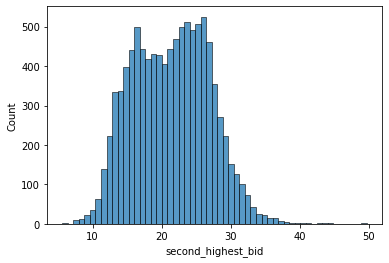

In [ ]:
sns.histplot(df_logs['second_highest_bid'])

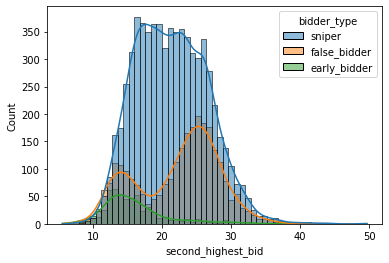

In [ ]:
sns.histplot(data=df_logs, x='second_highest_bid', hue='bidder_type', kde=True)

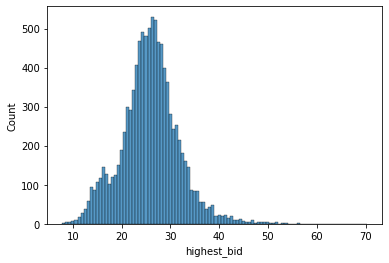

In [ ]:
sns.histplot(df_logs['highest_bid'])

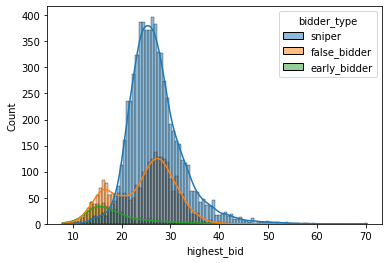

In [ ]:
sns.histplot(data=df_logs, x='highest_bid', hue='bidder_type', kde=True)

In [ ]:
df_logs[df_logs['bidder_type']=='sniper'].describe()

,bidder_id,highest_bid,second_highest_bid,bid_count
count,6755.000000,6755.000000,6755.000000,6755.000000
mean,7.002517,27.045261,21.408932,14.936936
std,0.815616,5.459380,5.191163,2.766747
min,6.000000,10.751742,7.245663,7.000000
25%,6.000000,23.531923,17.348642,13.000000
50%,7.000000,26.273776,21.153524,15.000000
75%,8.000000,29.576220,25.186572,17.000000
max,8.000000,70.221683,49.673937,25.000000


In [ ]:
df_logs[df_logs['bidder_type']=='early_bidder'].describe()

,bidder_id,highest_bid,second_highest_bid,bid_count
count,568.000000,568.000000,568.000000,568.000000
mean,2.484155,18.503168,16.000674,13.403169
std,1.699599,5.821968,4.750633,2.852232
min,0.000000,7.868697,5.722707,6.000000
25%,1.000000,14.501676,12.935116,11.000000
50%,2.000000,16.937472,14.998185,13.000000
75%,4.000000,20.808047,17.779471,15.000000
max,5.000000,46.272875,36.236309,21.000000


In [ ]:
df_logs[df_logs['bidder_type']=='false_bidder'].describe()

,bidder_id,highest_bid,second_highest_bid,bid_count
count,2677.0,2677.000000,2677.000000,2677.000000
mean,9.0,24.610619,22.307518,14.769518
std,0.0,6.038505,5.947895,2.833100
min,9.0,8.318309,5.600407,5.000000
25%,9.0,19.761193,16.964031,13.000000
50%,9.0,25.680811,23.655060,15.000000
75%,9.0,28.929757,26.612128,17.000000
max,9.0,44.685030,42.504413,25.000000


In [ ]:
df_logs.describe()

,bidder_id,highest_bid,second_highest_bid,bid_count
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,7.28060,25.908317,21.342295,14.805000
std,1.66245,6.020964,5.551900,2.811364
min,0.00000,7.868697,5.600407,5.000000
25%,6.00000,22.476510,16.791313,13.000000
50%,7.00000,25.882334,21.484619,15.000000
75%,9.00000,29.202421,25.539550,17.000000
max,9.00000,70.221683,49.673937,25.000000


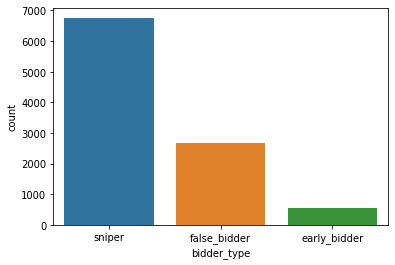

In [ ]:
sns.countplot(data=df_logs, x='bidder_type')

In [ ]:
df_logs.to_csv('/content/drive/MyDrive/BTP Data/Part8.csv')